<a href="https://colab.research.google.com/github/Fiona-cherutto/test-for-hypothyroidism/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2020_07_FIONA_CHERUTTO_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHYROIDISM PREDICTION - NAIROBI HOSPITAL


### Research Question

### a) Data Analytic Question
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success
This project will be successful when:

1) Determines whether or not the patient's symptoms indicate that the patient has hypothyroid

### c) Understanding the context
Hypothyroidism occurs when your body doesn't produce enough thyroid hormones. The thyroid is a small, butterfly-shaped gland that sits at the front of your neck. It releases hormones to help your body regulate and use energy. Your thyroid is responsible for providing energy to nearly every organ in your body

### d) Recording the Experimental Design

For this project will follow the following design steps below

1. Loading and previewing data

2.   Data cleanining 

3. Performing EDA

4. Feature Engineering

5. Decision trees

6. SVM

7. Challenging the solution

8.  Follow up question

9. Conclusion

### e) Data Relevance
The data provided for the analysis consist of healthcare datasetsdata collected focused on Thyroid patients. 

## 2. Importing Libraries

In [1]:

# Importing python libraries
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import export_graphviz 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 3.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## 3. Loarding datasetes

In [3]:
from google.colab import files
files.upload()

!unzip -q health analyst_Dataset.zip
!pip install --upgrade seaborn

Saving hypothyroid.csv to hypothyroid.csv
unzip:  cannot find or open health, health.zip or health.ZIP.
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


## 4. Reading the Data

In [4]:
# Loading the Data from the source i.e. csv
# ---
health = pd.read_csv('/content/hypothyroid.csv')

## 5. Checking the Data

In [5]:
# Determining the no. of records in our dataset
print(f'\nhealth   contains {health.shape[0]} samples and {health.shape[1]} variables')



health   contains 3163 samples and 26 variables


In [6]:
# Previewing the top of our dataset
#helth description
health.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [7]:
# Checking whether each column has an appropriate datatype
health.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [8]:
# Determining the no. of records in our dataset and the respective datatypes
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [9]:
# Checking for some statistical summariess of the dataframe
# Transposing the summaries for a better view
#
health.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


## 6. External Data Source Validation

>Validation

In [10]:
# Map the lowering function to all column names

health.columns = map(str.lower,health.columns)
health

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


## 7. Tidying the Dataset

In [11]:
# Printing the shape of our old dataset

print(health.shape)

(3163, 26)


In [12]:
# Identifying the Missing Data
# We count the number of non - missing values in the df dataframe
#
health.count()

status                       3163
age                          3163
sex                          3163
on_thyroxine                 3163
query_on_thyroxine           3163
on_antithyroid_medication    3163
thyroid_surgery              3163
query_hypothyroid            3163
query_hyperthyroid           3163
pregnant                     3163
sick                         3163
tumor                        3163
lithium                      3163
goitre                       3163
tsh_measured                 3163
tsh                          3163
t3_measured                  3163
t3                           3163
tt4_measured                 3163
tt4                          3163
t4u_measured                 3163
t4u                          3163
fti_measured                 3163
fti                          3163
tbg_measured                 3163
tbg                          3163
dtype: int64

In [13]:
# cheacking unique
health.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
tsh_measured                   2
tsh                          240
t3_measured                    2
t3                            70
tt4_measured                   2
tt4                          269
t4u_measured                   2
t4u                          159
fti_measured                   2
fti                          281
tbg_measured                   2
tbg                           53
dtype: int64

In [14]:

#checking for duplicates in the results column
health.duplicated().sum()

77

In [15]:
# Previewing the first  rows of the duplicated data
#
health[health.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


In [16]:
#dropping the duplicated columns in the ranking dataset
#keeping the first record of the duplicates
health.drop_duplicates(subset = None, keep = 'first', inplace = True)
health.shape

(3086, 26)

In [17]:
# Checking if there is any missing value in dataframe as a whole

health.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
tsh_measured                 False
tsh                          False
t3_measured                  False
t3                           False
tt4_measured                 False
tt4                          False
t4u_measured                 False
t4u                          False
fti_measured                 False
fti                          False
tbg_measured                 False
tbg                          False
dtype: bool

In [18]:
# Dealing with the Missing Data
# count those missing values in our dataframe
#
np.count_nonzero(health.isnull())

0

In [19]:
# Let's see these non-duplicate files
health.duplicated().any()


False

In [20]:
# replace all splces with "_"
health.columns = health.columns.str.replace(' ','_')
print (health)

           status age sex on_thyroxine  ... fti_measured  fti tbg_measured tbg
0     hypothyroid  72   M            f  ...            y   10            n   ?
1     hypothyroid  15   F            t  ...            y   17            n   ?
2     hypothyroid  24   M            f  ...            y    0            n   ?
3     hypothyroid  24   F            f  ...            y    6            n   ?
4     hypothyroid  77   M            f  ...            y   44            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3158     negative  58   F            f  ...            y   95            n   ?
3159     negative  29   F            f  ...            y   98            n   ?
3160     negative  77   M            f  ...            y  104            n   ?
3161     negative  74   F            f  ...            y  137            n   ?
3162     negative  56   F            t  ...            y  143            n   ?

[3086 rows x 26 columns]


In [21]:
#What unique values are there in each column entry in the dataset?
for i in health.columns:
 print(health[i].unique())
 print ("\n")

['hypothyroid' 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6

In [22]:
health['sex'].value_counts()
#We are able to notice 73 '?' values in gender column, What to do?

F    2119
M     894
?      73
Name: sex, dtype: int64

In [23]:
# Replacing the '?' character in the dataframe with NAN
#
health.replace('?', np.nan, inplace=True)

In [24]:
# Filling missing values in the sex column with mode
#
health.sex.fillna(health.sex.mode()[0], inplace = True)

In [25]:

# count those missing values in our dataframe
#
health.sex.isnull().sum()

0

In [26]:

# Checking the unique  in the  dataset
#
health.isnull().sum()

status                          0
age                           438
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           455
t3_measured                     0
t3                            680
tt4_measured                    0
tt4                           240
t4u_measured                    0
t4u                           239
fti_measured                    0
fti                           238
tbg_measured                    0
tbg                          2835
dtype: int64

In [27]:
# Dropping columns with more than high  missing values
# Dropping the tbg and tbg_measured columns
#
health.drop(['tbg'], axis = 1, inplace = True)

In [28]:
# cheacking unique
health.nunique()

status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
tsh_measured                   2
tsh                          239
t3_measured                    2
t3                            69
tt4_measured                   2
tt4                          268
t4u_measured                   2
t4u                          158
fti_measured                   2
fti                          280
tbg_measured                   2
dtype: int64

In [29]:
# Changing column datatypes to their appriopriate datatypes
# Numerical columns list

num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

In [30]:
# Categorical columns list
categ_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured',\
            't4u_measured', 'fti_measured', 'tbg_measured']

In [31]:

# Boolean columns list
bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

In [32]:

# Replacing bool columns with True or False value
#
for column in bool_cols:
  health[column] = health[column].replace('f', False)
  health[column] = health[column].replace('t', True)

In [33]:
# change using a for loop for columns to their appriopriate datatypes
#
for column in health.columns:
  if column in num_cols:
    health[column] = health[column].astype('float')
  elif column in categ_cols:
    health[column] = health[column].astype('category')
  elif column in bool_cols:
    health[column] = health[column].astype('bool')

In [34]:
# Filling missing values in numerical columns with mean
# A for loop has been used for efficiency
#
for column in num_cols:
  health[column].fillna(health[column].mean(), inplace = True)

In [35]:
health.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
dtype: int64

## 8. Exploratory Analysis

>Univarient Analysis

>Boxplot

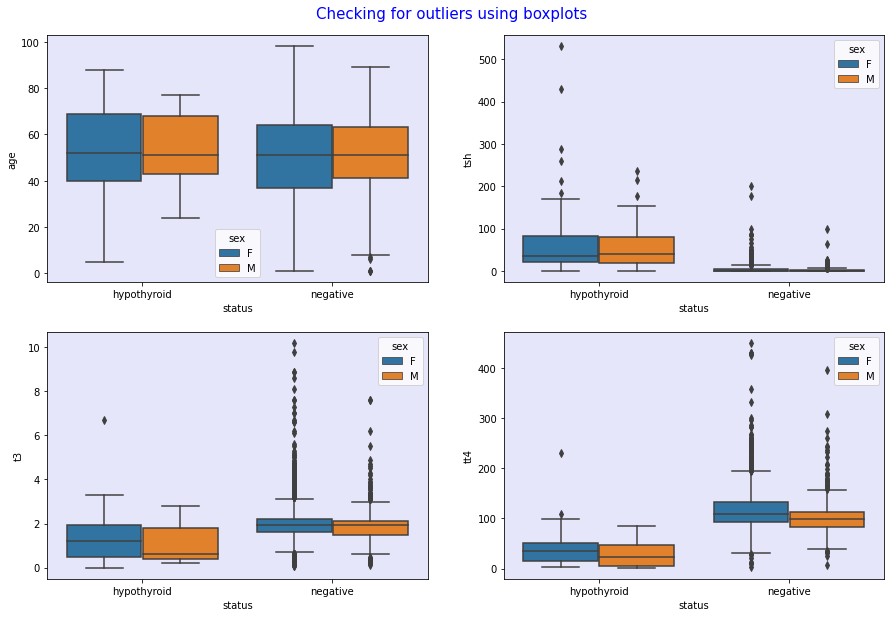

In [36]:

# Plotting boxplots to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'blue')
for ax, data, column in zip(axes.flatten(), health, num_cols):
  sns.boxplot(health.status, health[column], ax = ax, hue = health.sex)
  ax.set_facecolor('lavender') # Setting the background color to lavender

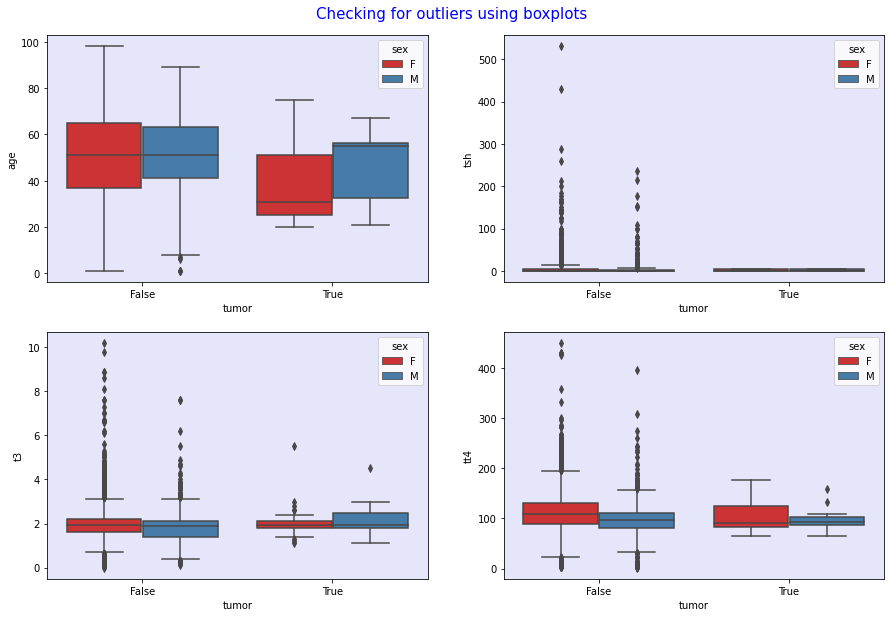

In [37]:

  # Plotting boxplots to check for outliers
colors = ['violet', 'yellow', 'gold', 'fuchsia']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'blue')
#for ax, data, column in zip(axes.flatten(), health, num_cols, colors):
for ax, data, column, color in zip(axes.flatten(), health, num_cols, colors):
  sns.boxplot(health.tumor, health[column], ax = ax, color = color, hue = health.sex, palette = 'Set1')
  ax.set_facecolor('lavender') # Setting the background color to lavender

from the boxplot we can observe
*   Age column has  no outliers
*   tsh column has the highest outliers when compared with t3 and tt4, when tumor diagnosis inducales false




> Density plot

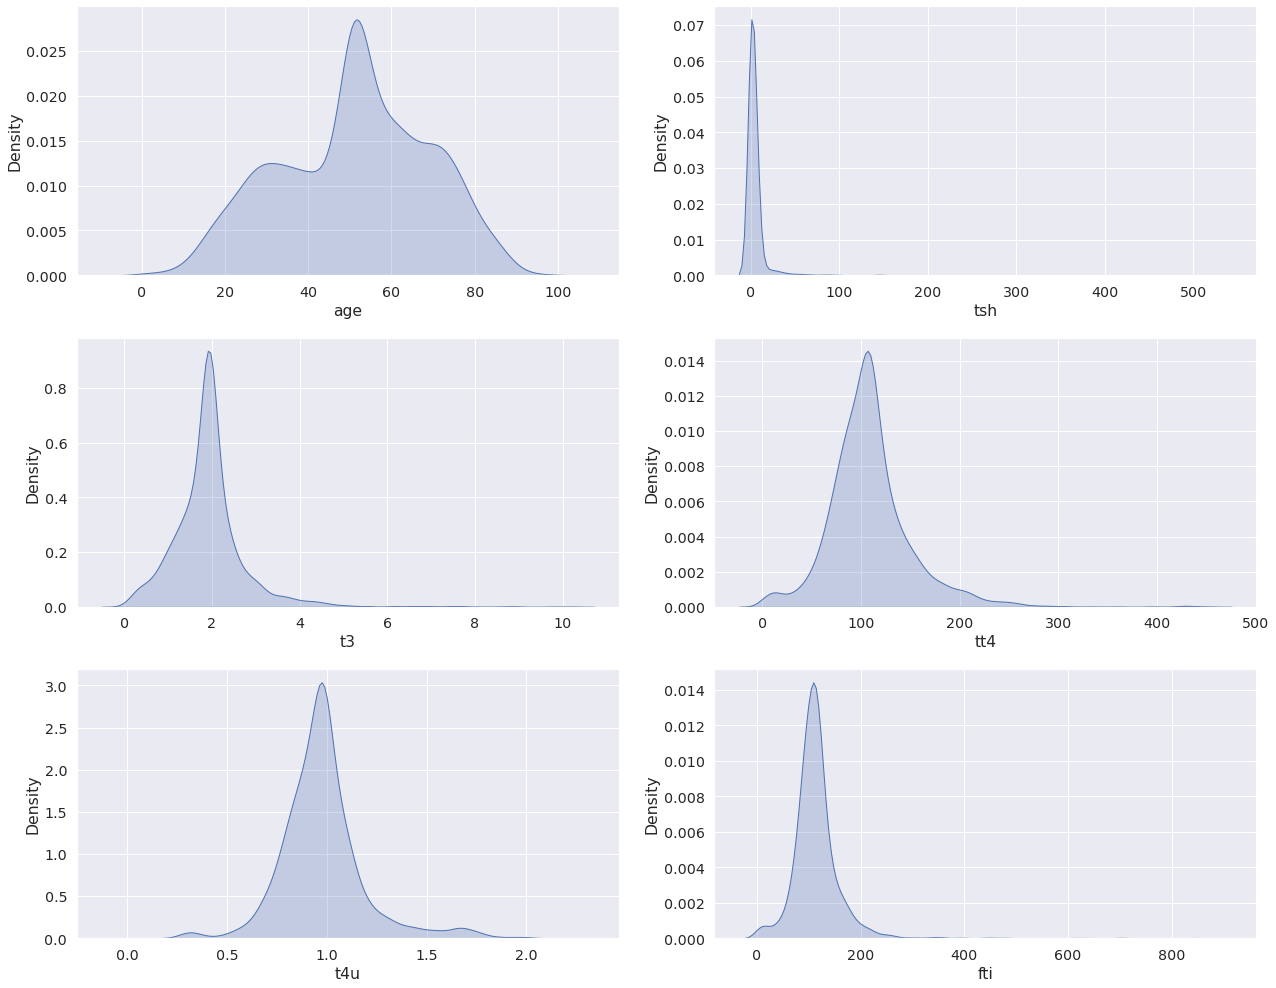

In [38]:
# Plotting density plots to show dispersion of total goals
# Setting the figure size to 18 by 14
sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=health, x=c, ax=axes[i], fill=True)
plt.tight_layout()

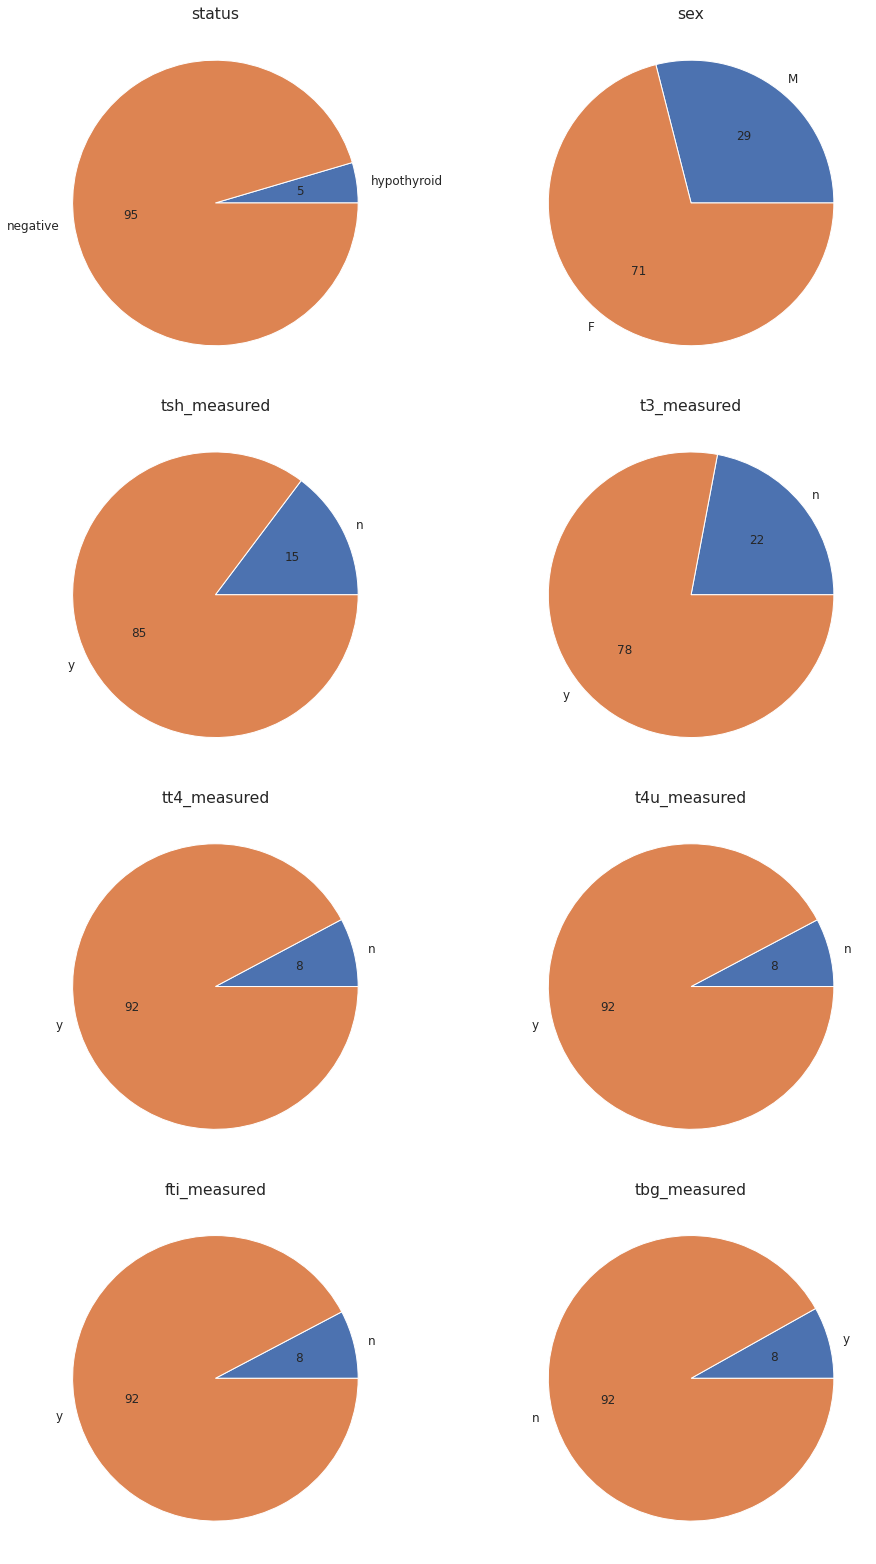

In [39]:
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(health[categ_cols]):
    _ = health[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

> Bivarient

> Barchart

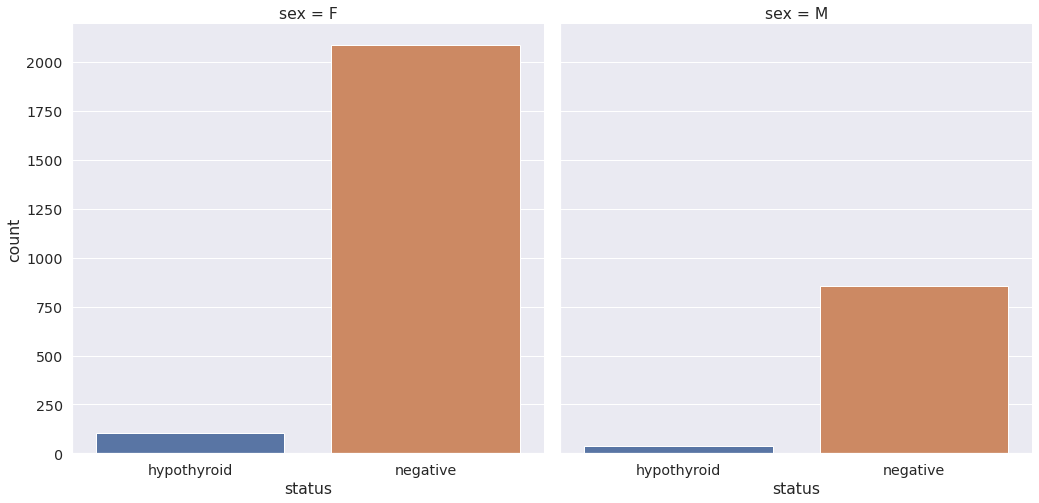

In [40]:
# Plotting bar charts
#
sns.catplot("status", col="sex", col_wrap=4, data=health, kind="count", height=7)
plt.show()

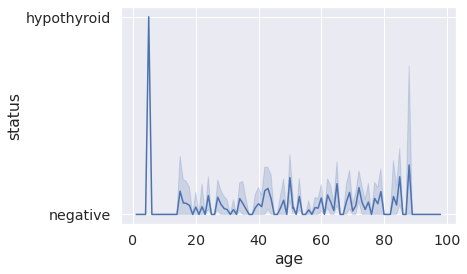

In [41]:
sns.lineplot(x = health['age'], y = health['status'])

>Sundurst

In [42]:
import plotly.express as px

In [43]:

fig = px.sunburst(health, path=['sex', 'status', 'tsh_measured'], values='age', color='age')
fig.show()

> Histogram

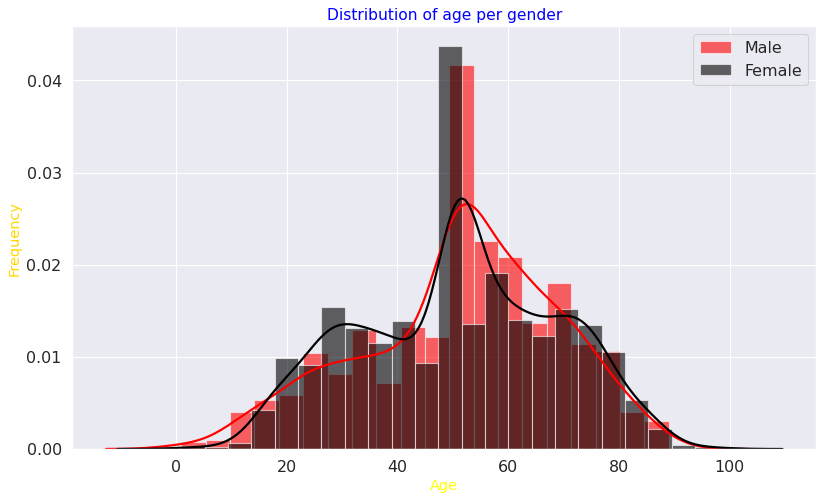

In [44]:
# Plotting histogram to show distribution of age per gender
# 
male = health.loc[health.sex=='M', 'age']    
female = health.loc[health.sex=='F', 'age']  

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="red", label="Male", **kwargs)
sns.distplot(female, color="black", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'blue')
plt.xlabel('Age', fontsize = 13, color = 'yellow')
plt.ylabel('Frequency', fontsize = 13, color = 'gold')
plt.legend()
plt.show()

>Density plots

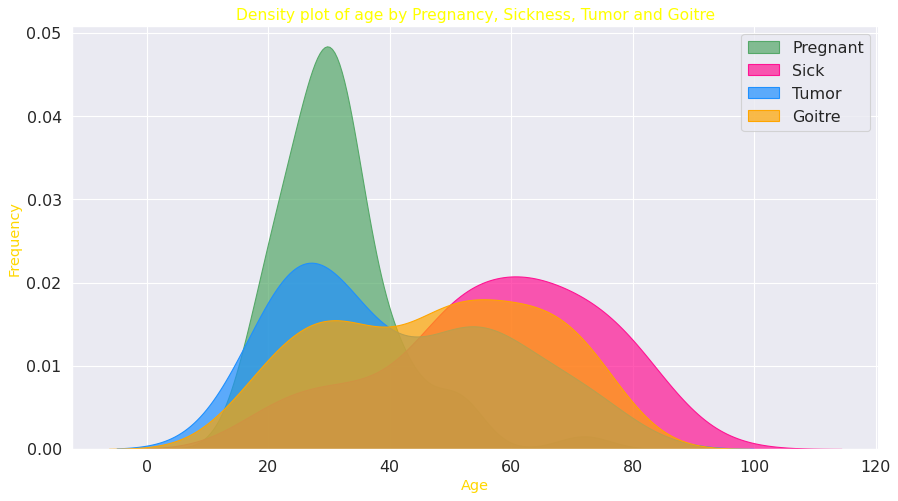

In [45]:
# Plotting Kernel Density Estimate plots for pregnant, sick, tumor and goitre persons
# Setting the figuresize of the graph to 13 in length and 7 in height
#
plt.figure(figsize=(13,7), dpi= 80)
sns.kdeplot(health.loc[health['pregnant'] == True, "age"], shade=True, color="g", label="Pregnant", alpha=.7)
sns.kdeplot(health.loc[health['sick'] == True, "age"], shade=True, color="deeppink", label="Sick", alpha=.7)
sns.kdeplot(health.loc[health['tumor'] == True, "age"], shade=True, color="dodgerblue", label="Tumor", alpha=.7)
sns.kdeplot(health.loc[health['goitre'] == True, "age"], shade=True, color="orange", label="Goitre", alpha=.7)
plt.title('Density plot of age by Pregnancy, Sickness, Tumor and Goitre', fontsize=14, color = 'yellow')
plt.xlabel('Age', fontsize = 13, color = 'gold')
plt.ylabel('Frequency', color = 'gold', fontsize = 13)
plt.legend()
plt.show()

<Figure size 480x320 with 0 Axes>

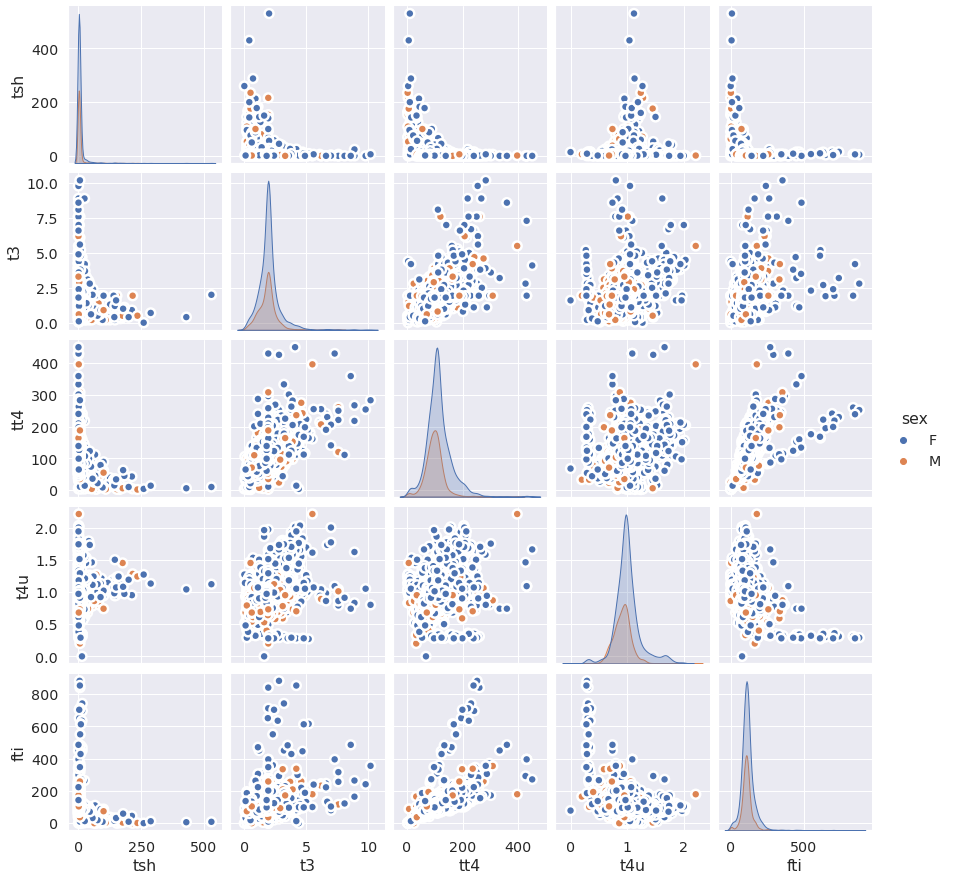

In [46]:
plt.figure(dpi= 80)
sns.pairplot(health[['tsh', 't3', 'tt4', 't4u', 'fti', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

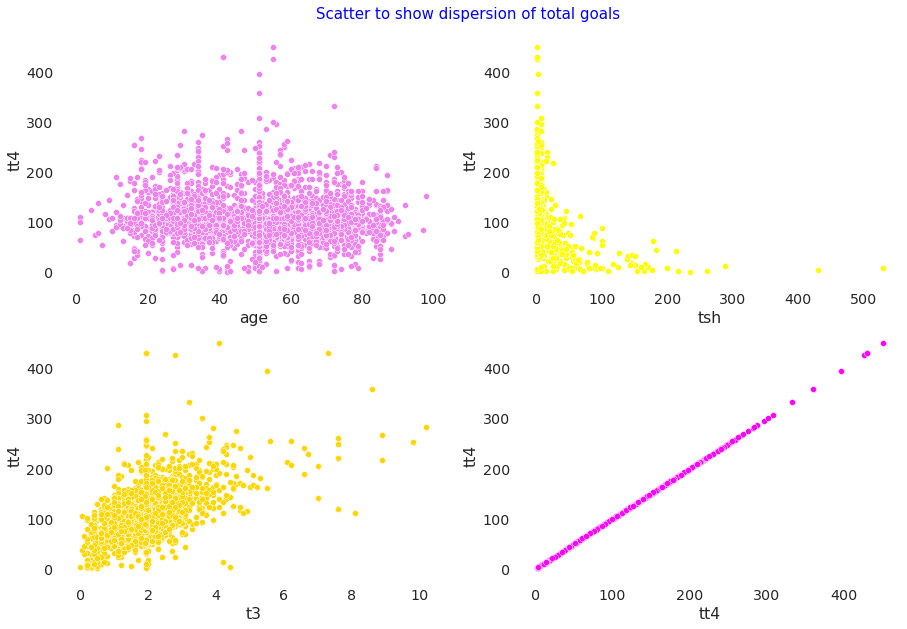

In [47]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Scatter to show dispersion of total goals', fontsize = 15, y = 0.92, color = 'blue')
for ax, data, column, color in zip(axes.flatten(), health, num_cols, colors):
  sns.scatterplot(health[column], health.tt4, ax = ax, color = color)
  ax.set_facecolor('white') 

In [48]:
health.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,hypothyroid,72.0,M,False,False,False,False,False,False,False,False,False,False,False,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,True,False,False,False,False,False,False,False,False,False,False,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,False,False,False,False,False,False,False,False,False,False,False,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,False,False,False,False,False,False,False,False,False,False,False,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,False,False,False,False,False,False,False,False,False,False,False,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


> Measures of Dispersion

> Standard Deviation

In [49]:
# Finding the standard deviation
health.std()

age                          17.854431
on_thyroxine                  0.351677
query_on_thyroxine            0.132327
on_antithyroid_medication     0.115883
thyroid_surgery               0.179647
query_hypothyroid             0.265282
query_hyperthyroid            0.265282
pregnant                      0.139220
sick                          0.174511
tumor                         0.113128
lithium                       0.025453
goitre                        0.173638
tsh                          22.180994
t3                            0.864826
tt4                          42.836471
t4u                           0.216873
fti                          57.780967
dtype: float64

> Variance

In [50]:
# Finding the variance
health.var()


age                           318.780701
on_thyroxine                    0.123677
query_on_thyroxine              0.017510
on_antithyroid_medication       0.013429
thyroid_surgery                 0.032273
query_hypothyroid               0.070374
query_hyperthyroid              0.070374
pregnant                        0.019382
sick                            0.030454
tumor                           0.012798
lithium                         0.000648
goitre                          0.030150
tsh                           491.996510
t3                              0.747925
tt4                          1834.963265
t4u                             0.047034
fti                          3338.640107
dtype: float64

> Inter-Quartile Range

In [51]:
# Finding the quantiles of the herbicide average prices
health.quantile([0.25,0.5,0.75])

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh,t3,tt4,t4u,fti
0.25,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1.500000,85.0,0.860000,92.0
0.50,51.112538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,1.933666,107.0,0.977559,110.0
0.75,64.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.80932,2.200000,124.0,1.050000,126.0


> Skewness

In [52]:
# Determining the skeweness
health.skew()

age                          -0.183279
on_thyroxine                  2.022919
query_on_thyroxine            7.292388
on_antithyroid_medication     8.399915
thyroid_surgery               5.198265
query_hypothyroid             3.197543
query_hyperthyroid            3.197543
pregnant                      6.903380
sick                          5.373542
tumor                         8.615990
lithium                      39.261928
goitre                        5.404288
tsh                          11.145457
t3                            2.453770
tt4                           1.528402
t4u                           0.991289
fti                           5.425255
dtype: float64

> Kurtosis

In [53]:
# Determining the Kurtosis 
health.kurt()

age                            -0.621452
on_thyroxine                    2.093556
query_on_thyroxine             51.212118
on_antithyroid_medication      68.603033
thyroid_surgery                25.038187
query_hypothyroid               8.229613
query_hyperthyroid              8.229613
pregnant                       45.686261
sick                           26.892381
tumor                          72.282135
lithium                      1540.497405
goitre                         27.223973
tsh                           180.713221
t3                             14.891061
tt4                             7.679570
t4u                             3.970968
fti                            52.799848
dtype: float64

In [54]:
#Displaying the summary statistics of the dataframe
#
health.describe()

,age,tsh,t3,tt4,t4u,fti
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


## 9. Implementing the Solution

> Checking for Multi-collinearity

In [55]:
# Let's display the correlations between the variables
corr = health[['age','tsh', 't3', 'tt4', 't4u', 'fti']].corr()
corr 


,age,tsh,t3,tt4,t4u,fti
age,1.000000,-0.007352,-0.265743,-0.086317,-0.188786,0.017737
tsh,-0.007352,1.000000,-0.169724,-0.309057,0.072508,-0.240105
t3,-0.265743,-0.169724,1.000000,0.533845,0.386450,0.281517
tt4,-0.086317,-0.309057,0.533845,1.000000,0.320415,0.677345
t4u,-0.188786,0.072508,0.386450,0.320415,1.000000,-0.294437
fti,0.017737,-0.240105,0.281517,0.677345,-0.294437,1.000000


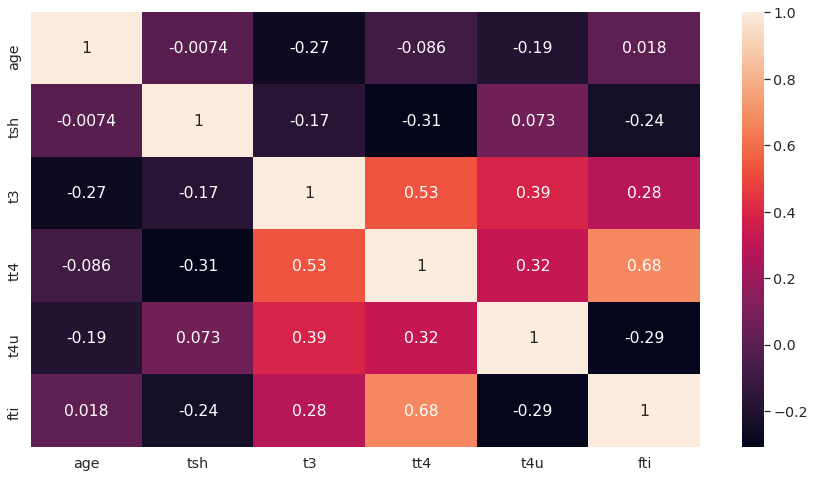

In [56]:
# Creating a heatmap of the corr
#
plt.figure(figsize = (15, 8))
sns.heatmap(corr, annot = True)
plt.show()

> RandomForest

In [57]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
#X = health.drop('status', axis = 1)
X = health.drop('status', axis = 1)
y = np.where(health.status == 'hypothyroid', 1, 0)
# Encoding categorical variables
#
X = pd.get_dummies(X)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.042117,0.044085
std,0.200964,0.184016
min,0.000000,0.000056
25%,0.000000,0.000056
50%,0.000000,0.000056
75%,0.000000,0.000056
max,1.000000,0.988324


In [58]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013141124792262862
Mean Squared Error: 0.004824787457763925
Root Mean Squared Error: 0.06946069001790815


In [59]:
# Selecting the independent variables and the target variable
#
X = health.drop('status', axis = 1)
y = np.where(health.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9924406047516199 and the f1 score is 0.9066666666666667


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       887
           1       0.94      0.87      0.91        39

    accuracy                           0.99       926
   macro avg       0.97      0.93      0.95       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  5,  34]])

In [60]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
df = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
df

,importance
feature,
fti,0.3312
tsh,0.2245
tt4,0.2211
t3,0.0790
t4u,0.0396
age,0.0391
on_antithyroid_medication,0.0104
query_hypothyroid,0.0092
on_thyroxine,0.0079


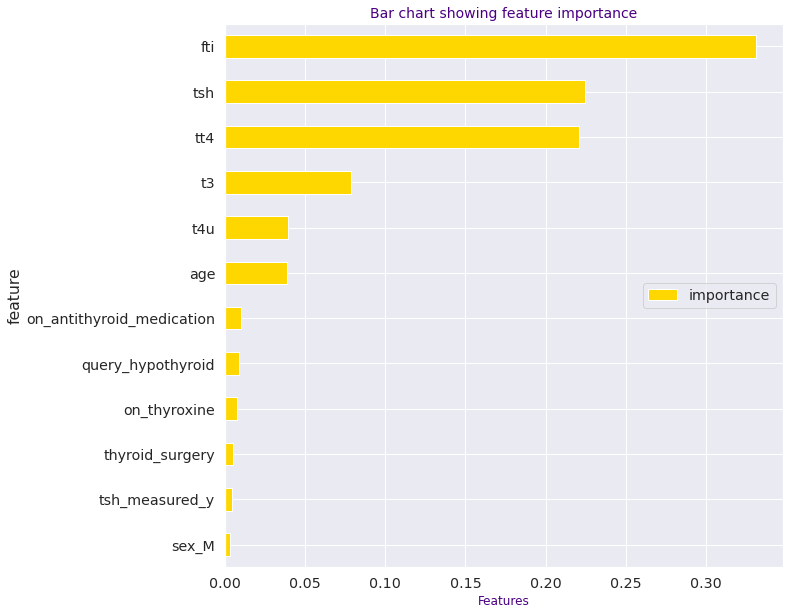

In [61]:
# Bar chart of feature importance in descending order
#
df = df[:12].sort_values(by = 'importance', ascending = True)
df.plot(kind = 'barh', figsize = (10, 10), color = 'gold')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [62]:
# Selecting only important features and the y variable
#
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'tsh_measured_y',
        'thyroid_surgery', 'sick', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tsh_measured_n']]

y = np.where(health.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

In [63]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
#X = health.drop('status', axis = 1)
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'tsh_measured_y',
        'thyroid_surgery', 'sick', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tsh_measured_n']]

y = np.where(health.status == 'hypothyroid', 1, 0)
# Encoding categorical variables
#
#X = pd.get_dummies(X)

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,926.000000,926.000000
mean,0.042117,0.043261
std,0.200964,0.180322
min,0.000000,0.000056
25%,0.000000,0.000056
50%,0.000000,0.000056
75%,0.000000,0.000056
max,1.000000,0.982870


In [64]:

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013848784521094712
Mean Squared Error: 0.004940333520483686
Root Mean Squared Error: 0.0702875061478474


>Parameter Tuning

In [65]:
# Previewing the parameters to tune
#
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 30}


In [67]:
#
# Selecting only important features and the y variable
#
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'tsh_measured_y',
        'thyroid_surgery', 'sick', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tsh_measured_n']]

y = np.where(health.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9881209503239741 and the f1 score is 0.8450704225352113


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.94      0.77      0.85        39

    accuracy                           0.99       926
   macro avg       0.96      0.88      0.92       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  9,  30]])

>Visualising RandomForest

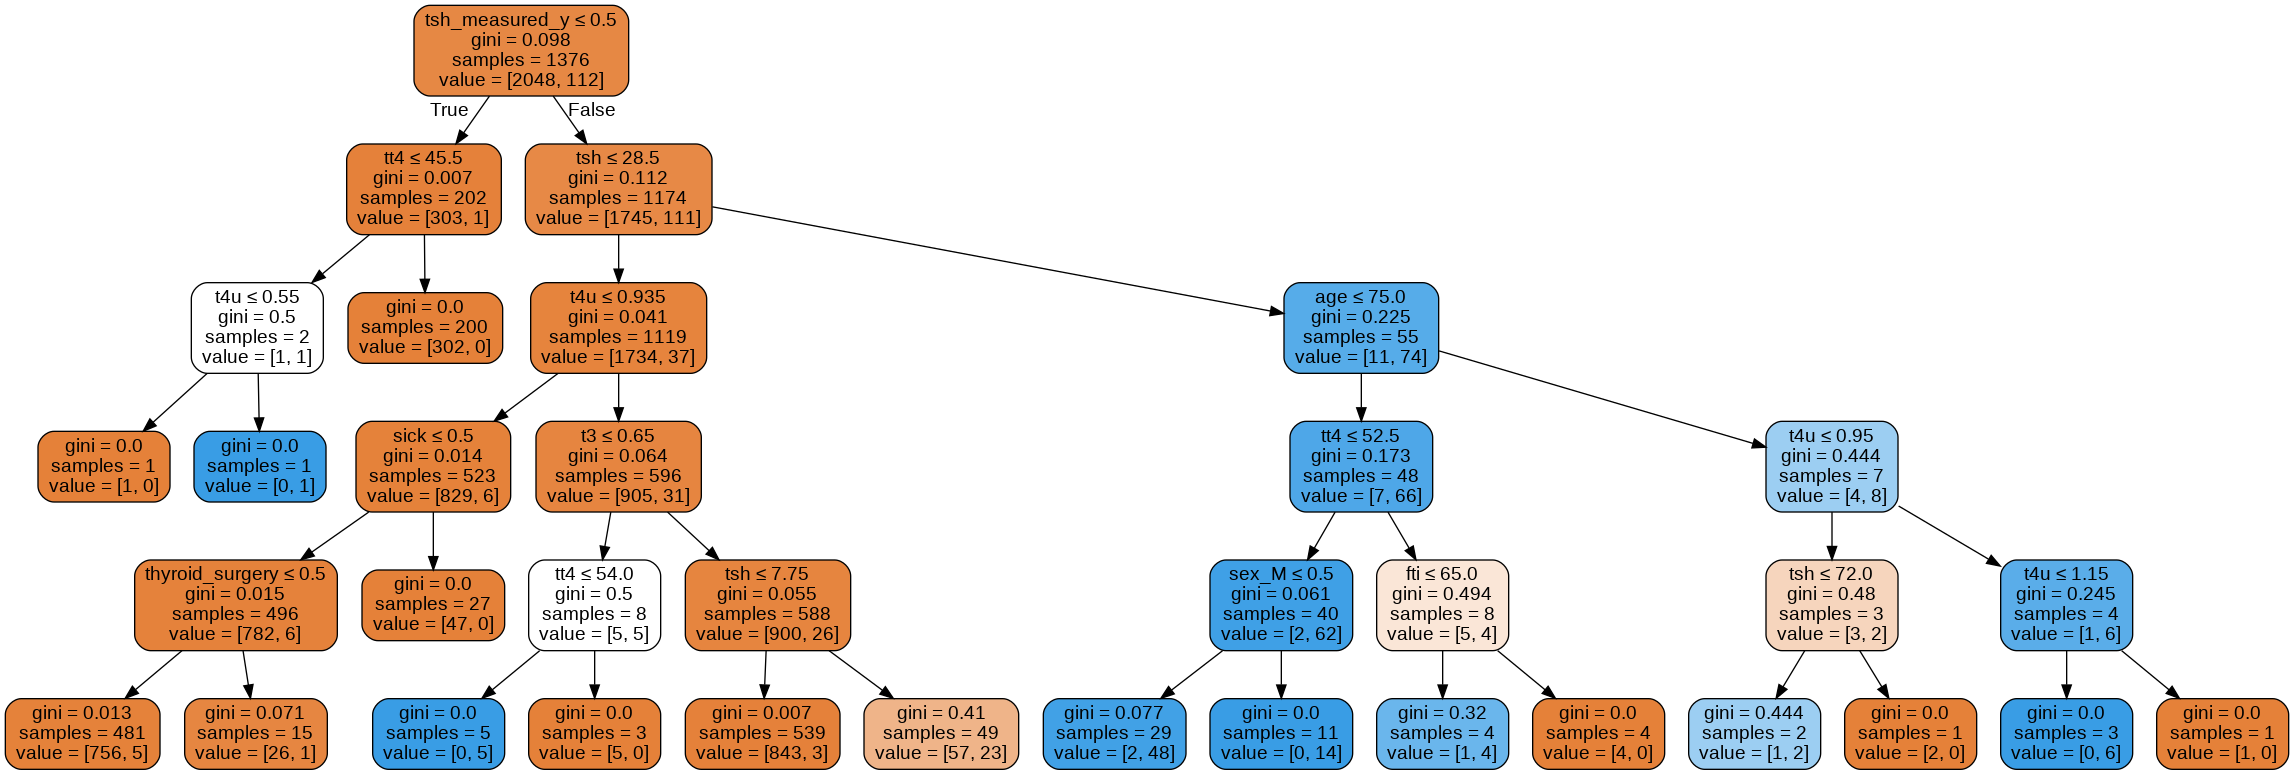

In [68]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
# picking the 3rd tree from the forest
tree = rf.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

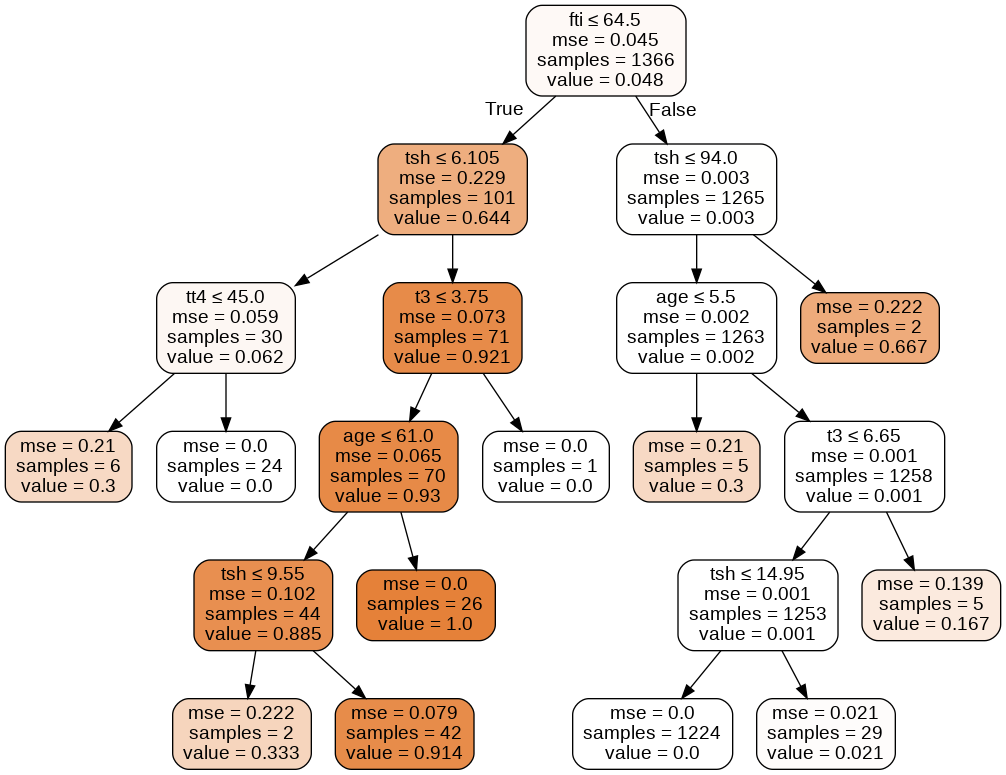

In [69]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

> Cross Validation to check for the stability of the model

In [70]:
# Performing cross validation of ten folds
#
scores = cross_val_score(rf, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8425111925111924
Standard deviation of the cross validation scores is 0.06444041762615443


>AdaBoostClassifier

In [71]:
# Selecting the independent variables and the target variable
#
X = health.drop('status', axis = 1)
y = np.where(health.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
#
acc_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print(f'The accuracy score is: {acc_1} and the f1 score is {f1_1}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

>Feature Importance

In [72]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
df = pd.DataFrame({'feature': X.columns, 'importance': ada.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
df

,importance
feature,
fti,0.22
age,0.16
tsh,0.16
tt4,0.12
t3,0.12
t4u,0.12
on_antithyroid_medication,0.04
query_hypothyroid,0.02
thyroid_surgery,0.02


>Remodelling with the most important features

In [73]:
# Selecting only important features and the y variable
#
X = X[['fti', 'age', 'tsh', 't4u', 't3', 'tt4', 'on_antithyroid_medication', 'query_hypothyroid', 'thyroid_surgery', 'on_thyroxine']]

y = np.where(health.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9935205183585313 and the f1 score is 0.9210526315789475


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.95      0.90      0.92        39

    accuracy                           0.99       926
   macro avg       0.97      0.95      0.96       926
weighted avg       0.99      0.99      0.99       926



array([[885,   2],
       [  4,  35]])

>Hyperparameter Tuning

In [74]:
# Previewing the parameters to tune
#
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [75]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 50}


In [76]:
# Selecting only important features and the y variable
#
X = X[['fti', 'age', 'tsh', 't4u', 't3', 'tt4', 'on_antithyroid_medication', 'query_hypothyroid', 'thyroid_surgery', 'on_thyroxine']]

y = np.where(health.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(learning_rate=1, n_estimators=30, random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9924406047516199 and the f1 score is 0.9090909090909091


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.92      0.90      0.91        39

    accuracy                           0.99       926
   macro avg       0.96      0.95      0.95       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  4,  35]])

> Visualising the 3rd stump

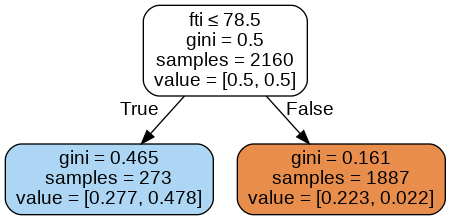

In [77]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = ada.estimators_[3]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

>Cross Validation to check for the stability of the model

In [78]:
# Performing cross validation of ten folds
#
scores = cross_val_score(ada, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.871661347592382
Standard deviation of the cross validation scores is 0.09766432601055766


>Gradient BoostClassifier

In [79]:
# Selecting the independent variables and the target variable
#
X = health.drop('status', axis = 1)
y = np.where(health.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
gbr = GradientBoostingClassifier(random_state = 0)
gbr.fit(X_train, y_train)


y_pred_gbr = gbr.predict(X)

# Making predictions
#
y_pred = gbr.predict(X_test)

# Measuring the accuracy of the model
#
acc_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print(f'The accuracy score is: {acc_1} and the f1 score is {f1_1}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9946004319654428 and the f1 score is 0.9367088607594937


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.93      0.95      0.94        39

    accuracy                           0.99       926
   macro avg       0.96      0.97      0.97       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  2,  37]])

In [80]:

# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
df = pd.DataFrame({'feature': X.columns, 'importance': np.round(gbr.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
df

,importance
feature,
fti,0.6740
tsh,0.2207
age,0.0214
t3,0.0205
on_antithyroid_medication,0.0163
tt4,0.0135
query_hypothyroid,0.0120
t4u,0.0081
on_thyroxine,0.0075


In [81]:
# Selecting only important features and the y variable
#
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'tsh_measured_y',
        'thyroid_surgery', 'sick', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tsh_measured_n']]

y = np.where(health.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
gbr = GradientBoostingClassifier(random_state = 0)
gbr.fit(X_train, y_train)


y_pred_gbr = gbr.predict(X)

# Making predictions
#
y_pred = gbr.predict(X_test)


# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9946004319654428 and the f1 score is 0.9367088607594937


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.93      0.95      0.94        39

    accuracy                           0.99       926
   macro avg       0.96      0.97      0.97       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  2,  37]])

>Parameter Tuning

In [82]:
# Previewing the parameters to tune
#
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = GradientBoostingClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 3, 'n_estimators': 30}


In [84]:
# Applying the best parameters to the model
#
# Selecting only important features and the y variable
#
X = X[['age', 'on_thyroxine', 'sex_F', 'sex_M', 'tsh_measured_y',
        'thyroid_surgery', 'sick', 'tsh', 't3', 'tt4', 't4u', 'fti', 'tsh_measured_n']]

y = np.where(health.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
gbr = GradientBoostingClassifier(random_state = 0)
gbr.fit(X_train, y_train)

# Making predictions
#
y_pred = gbr.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9946004319654428 and the f1 score is 0.9367088607594937


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       887
           1       0.93      0.95      0.94        39

    accuracy                           0.99       926
   macro avg       0.96      0.97      0.97       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  2,  37]])

>Visualising the 3rd tree of GradientBoostingClassifier

In [85]:
# Performing cross validation of ten folds
#
scores = cross_val_score(gbr, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8921086480569238
Standard deviation of the cross validation scores is 0.045903326280236884


>Support Vector Classifier

In [96]:
# Selecting the independent variables and the target variable
#
X = health[['fti', 'tsh']].values
y = np.where(health.status == 'hypothyroid', 1, 0)

# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model


# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9838012958963283 and the f1 score is: 0.7692307692307693
The accuracy score of Linear     is: 0.9859611231101512 and the f1 score is: 0.8169014084507042
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


>visualizing all 3 svc

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Set-up 1x3 grid for plotting.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Comparison of different SVC Kernels', fontsize = 15)

# title for the plots
titles = ('Polynomial kernel', 'Linear kernel', ' RBF kernel')

# Randomly selecting 300 datapoints to plot
X = health[['fti', 'tsh']].iloc[:150, :].values
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, axes.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('fti')
    ax.set_ylabel('tsh')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

>Hyperparameter tuning

In [89]:
# Previewing parameters of the SVC model that can be tuned
#
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
#
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# Selecting the independent variables and the target variable
#
X = health[['fti', 'tsh']]
y = np.where(health.status == 'hypothyroid', 1, 0)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'gamma': 3.5833333333333335, 'C': 101}


>Remodelling with optimal parameters

In [91]:
# Selecting only important features and the y variable
#
X = health.drop('status', axis = 1)

y = np.where(health.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardising features
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Instantiating the model with optimal features
#
svc = SVC(C = 21, gamma = 0.03125, kernel='linear')
svc.fit(X_train, y_train)

# Making predictions
#
y_pred = svc.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9881209503239741 and the f1 score is 0.8493150684931507


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.91      0.79      0.85        39

    accuracy                           0.99       926
   macro avg       0.95      0.90      0.92       926
weighted avg       0.99      0.99      0.99       926



array([[884,   3],
       [  8,  31]])

>Crossvalidation to check the stability

In [93]:
# Performing cross validation of ten folds
#
scores = cross_val_score(svc, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8133239546283024
Standard deviation of the cross validation scores is 0.07691071483570998


>Using different models to check  performance can be improved

In [94]:
# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Creating a list of classifier algorithms to compare with
#
models = [GradientBoostingClassifier(), DecisionTreeClassifier(), XGBClassifier(), KNeighborsClassifier(),\
          GaussianNB(), LogisticRegression()]

# Creating lists of the algorithms, to store the accuracy scores of each fold
#
GradientBoosting, DecisionTree, XGB, KNeighbors, GaussianNB, LogisticRegression = ([] for x in range(6))

# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [GradientBoosting, DecisionTree, XGB, KNeighbors, GaussianNB, LogisticRegression]

# Selecting the independent variables and the target variable
#
X = health.drop('status', axis = 1)
y = np.where(health.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, shuffle = True, random_state = 0)

# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'f1', cv = kfold)))
  
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'GradientBoosting': GradientBoosting, 'DecisionTree': DecisionTree, 'XGB': XGB,\
              'KNeighbors': KNeighbors, 'GaussianNB': GaussianNB, 'LogisticRegression': LogisticRegression}, index = range(1, 11))

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

# Previewing the scores dataframe
#
scores

,GradientBoosting,DecisionTree,XGB,KNeighbors,GaussianNB,LogisticRegression
1,0.960000,0.923077,1.000000,0.956522,0.086275,0.909091
2,0.880000,0.888889,0.880000,0.782609,0.102362,0.727273
3,0.965517,1.000000,1.000000,0.888889,0.113360,0.846154
4,0.941176,0.909091,0.941176,0.875000,0.127341,0.838710
5,0.971429,0.914286,0.971429,0.875000,0.131783,0.812500
6,0.761905,0.761905,0.782609,0.818182,0.073529,0.700000
7,0.864865,0.833333,0.914286,0.709677,0.129555,0.838710
8,0.833333,0.777778,0.857143,0.777778,0.139344,0.666667
9,0.952381,0.857143,0.952381,0.909091,0.081967,0.947368
10,0.869565,0.869565,0.833333,0.818182,0.080000,0.761905


### 10.Follow up questions

a). Did we have the right question?

Yes the research question was clearly specified

b). Do we need other data to answer our question?

no the data is sufficient 

c). Did we have the right data?

yes the data was correct

>Conclussion


Linear is the best performing kernel in SupportVectorClassifier with 98.5% and f1 of 86%

AdaBoostClassifier performs well with an f1 score of approximately 86%
Out of all the models used to predict whether a person has hypothyroid. 